# Lending Club Case Study

**Problem Statement**

### Read Dataset

In [1]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import warnings
warnings.filterwarnings("ignore")

In [2]:
#read the dataset and check the first five rows
loan = pd.read_csv(r"C:\Users\Saurabh\OneDrive\AI_ML\Lending Club Case Study\loan\loan.csv")
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
#Check the shape of the dataframe
loan.shape
loan.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

### Data Handling and Cleaning

- Numerical Columns are having special characters 
- Columns having too many missing values
- Columns having constant values such as 0 , xxx , 999 etc.
- Fix incorrect data types

In [4]:
#Check the number of null values in the columns
loan.isnull().sum() 


id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [5]:
# Check for columns with more than 50% missing values(NA)
loan = loan.loc[:, (loan.isna().sum() < (loan.shape[0]/2))]
loan.shape

(39717, 54)

In [6]:
# Check for columns with more than 50% missing values(0)
loan = loan.loc[:, ((loan == 0).sum() <(loan.shape[0]/2))]


In [7]:
#check rows with more than 50% NaN values
loan.isna().sum(axis=1).max()

## There arent any row which has too many null values

4

In [8]:
#check Duplicate data
loan.value_counts()

id       member_id  loan_amnt  funded_amnt  funded_amnt_inv  term        int_rate  installment  grade  sub_grade  emp_title               emp_length  home_ownership  annual_inc  verification_status  issue_d  loan_status  pymnt_plan  url                                                               desc                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [9]:
#Columns pymnt_plan,initial_list_status,policy_code,application_type has same value for all rows. It doesnt give proper data variation trend. 
# Drop columns.
loan.drop(['pymnt_plan','initial_list_status','policy_code','application_type'],axis=1,inplace=True)


In [10]:
# Re-verify dataset
loan.value_counts()

# Re-Count null values
loan.isnull().sum() 

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
emp_title               2459
emp_length              1075
home_ownership             0
annual_inc                 0
verification_status        0
issue_d                    0
loan_status                0
url                        0
desc                   12942
purpose                    0
title                     11
zip_code                   0
addr_state                 0
dti                        0
earliest_cr_line           0
inq_last_6mths             0
open_acc                   0
revol_bal                  0
revol_util                50
total_acc                  0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
last_pymnt_d  

In [11]:
# Check desc column for missing values
loan.desc.value_counts()

# This column does not have any predictive pattern of values, hence we can not replace the missing values with any of the existing data
# Replace missing values with 'Not Available'
loan.desc.fillna('Not Available',inplace=True)

In [12]:
# Check emp title column for missing values
loan[loan['emp_title'].isna()]

# Since this column has meaningful values which can give us insights, it is not safe to drop the column
# Check emp title column for most common value
loan['emp_title'].mode()

# Replace missing values with most frequent value
loan['emp_title'].fillna(value=loan['emp_title'].mode().values[0],inplace=True)

# Re-Count null values
loan.isnull().sum() 
loan.shape


(39717, 37)

In [13]:
# Check employment length (emp_length) column for missing values
loan['emp_length'].isna().sum()

# Check values for column - emp_length
loan['emp_length'].value_counts()

# Column has numerical data type but contains string 'years','+','<'. 
# Remove the strings to make the column numeric.
loan['emp_length'] = loan['emp_length'].apply(lambda x: str(x).replace('years','').replace('year','').replace('10+ ','11').replace('< 1 ','0.5'))
loan['emp_length'] = loan['emp_length'].astype(float)


# Verify the column
loan['emp_length'].value_counts()

# Since this column has meaningful values which can give us insights, it is not safe to drop the column
# Replacing NaN values with mean value will give minimal impact on the computations. 
loan['emp_length'].mean()
loan['emp_length'].fillna(value=round(loan['emp_length'].mean()),inplace=True)

# Re-Count null values
loan.isnull().sum() 

# Reset index
loan.reset_index


<bound method DataFrame.reset_index of             id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  ... revol_bal  \
0       36 months   10.65%       162.87     B 

In [14]:
# Check title column for missing values
loan[loan.title.isnull()]

# Since this column has meaningful values which can give us insights, it is not safe to drop the column
# This column is a categorization of the column purpose , we can use the same value to fill up missing values 
loan.loc[(loan['title'].isna()), 'title'] = loan[loan.title.isnull()].purpose.values

# Re-Count null value
loan.isna().sum()


id                      0
member_id               0
loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
url                     0
desc                    0
purpose                 0
title                   0
zip_code                0
addr_state              0
dti                     0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
revol_bal               0
revol_util             50
total_acc               0
total_pymnt             0
total_pymnt_inv         0
total_rec_prncp         0
total_rec_int           0
last_pymnt_d           71
last_pymnt_amnt         0
last_credit_pull_d      2
dtype: int64

In [15]:
# Check last_pymnt_d column for missing values
loan[loan.last_pymnt_d.isnull()]

# All of records with missing value for 'last_pymnt_d' belongs to loans with status as 'Charged off'. 
# Check most frequent value for last payment date when loan status is 'Charged off'
loan[loan['loan_status'] == 'Charged Off'].last_pymnt_d.mode()

# Replace missing values with most frequent value
loan.loc[(loan['last_pymnt_d'].isna()), 'last_pymnt_d'] = loan[loan['loan_status'] == 'Charged Off'].last_pymnt_d.mode().values[0]


# Re-Count null value
loan.isna().sum()

id                      0
member_id               0
loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
url                     0
desc                    0
purpose                 0
title                   0
zip_code                0
addr_state              0
dti                     0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
revol_bal               0
revol_util             50
total_acc               0
total_pymnt             0
total_pymnt_inv         0
total_rec_prncp         0
total_rec_int           0
last_pymnt_d            0
last_pymnt_amnt         0
last_credit_pull_d      2
dtype: int64

In [16]:
# Check last_credit_pull_d column for missing values
loan[loan.last_credit_pull_d.isnull()]

# All of records with missing value for 'last_credit_pull_d' belongs to loans with status as 'Charged off'. 
# Check total count of data for loan status as 'Charged off'
loan['loan_status'].value_counts() 
# 66 out of 5333 records have missing values for 'last_plast_credit_pull_d' which is roughly only 0.03% of the data count.
# Hence removing 2 records should not affect the overall analysis for charged off records.

#Removing rows with missing values for 'last_credit_pull_d'
loan = loan[~loan['last_credit_pull_d'].isna()]

# Re-Count null value
loan.isna().sum()

id                      0
member_id               0
loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
url                     0
desc                    0
purpose                 0
title                   0
zip_code                0
addr_state              0
dti                     0
earliest_cr_line        0
inq_last_6mths          0
open_acc                0
revol_bal               0
revol_util             50
total_acc               0
total_pymnt             0
total_pymnt_inv         0
total_rec_prncp         0
total_rec_int           0
last_pymnt_d            0
last_pymnt_amnt         0
last_credit_pull_d      0
dtype: int64

In [17]:
# Check values for column - term
loan['term'].value_counts()

# Column has numerical data type but contains the string 'months' 
# Remove the string 'months' to make the column numeric
loan['term'] = loan['term'].apply(lambda x: x.replace('months',''))

# Verify the column
loan['term'].value_counts()


term
 36     29094
 60     10621
Name: count, dtype: int64

In [18]:
# Check values for column - int_rate
loan['int_rate'].value_counts()

# Column has numerical data type but contains the string '%'. Also the data type should be 'float' instead of int.
# Remove the string '%' to make the column numeric and change the data type to 'float'.
loan['int_rate'] = loan['int_rate'].apply(lambda x: x.replace('%','')).astype(float)

# Verify the column
loan['int_rate'].value_counts()

int_rate
10.99    956
13.49    826
11.49    825
7.51     787
7.88     725
        ... 
18.36      1
16.96      1
16.15      1
16.01      1
17.44      1
Name: count, Length: 371, dtype: int64

In [19]:
# Check values for column - revol_util
loan['revol_util'].value_counts()

# Column has numerical data type but contains the string '%'. Also the data type should be 'float' instead of int.
# Remove the string '%' to make the column numeric and change the data type to 'float'.
loan['revol_util'] = loan['revol_util'].apply(lambda x: str(x).replace('%','')).astype(float)

# Verify the column
loan['revol_util'].value_counts()

revol_util
0.00     977
0.20      63
63.00     62
40.70     58
0.10      58
        ... 
25.74      1
47.36      1
24.65      1
10.61      1
7.28       1
Name: count, Length: 1089, dtype: int64

In [20]:
# Check the datatypes of all the columns
loan.dtypes

id                       int64
member_id                int64
loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                    object
int_rate               float64
installment            float64
grade                   object
sub_grade               object
emp_title               object
emp_length             float64
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
url                     object
desc                    object
purpose                 object
title                   object
zip_code                object
addr_state              object
dti                    float64
earliest_cr_line        object
inq_last_6mths           int64
open_acc                 int64
revol_bal                int64
revol_util             float64
total_acc                int64
total_pymnt            float64
total_pymnt_inv        float64
total_re

In [21]:
# Check column term
loan.term.value_counts()

# term should be a numeric column(integer)
loan.term = loan.term.astype(int)

#### Extract Date Information

- Extract Day, Month and Year from dates into individual columns to have more granularity of the time dependency
- Drop the date column after extraction is complete

In [22]:
# Check column issue_d,earliest_cr_line,last_pymnt_d,last_credit_pull_d
loan['issue_d'].value_counts()
loan['earliest_cr_line'].value_counts()
loan['last_pymnt_d'].value_counts()
loan['last_credit_pull_d'].value_counts()

# These should be date columns. 

loan['issue_d'] = pd.to_datetime(loan['issue_d'],format='%b-%y')
loan['earliest_cr_line'] = pd.to_datetime(loan['earliest_cr_line'],format='%b-%y')
loan['last_pymnt_d'] = pd.to_datetime(loan['last_pymnt_d'],format='%b-%y')
loan['last_credit_pull_d'] = pd.to_datetime(loan['last_credit_pull_d'],format='%b-%y')

# Also we can extract the month and year for more granular analysis

loan['issue_day'] = pd.DatetimeIndex(loan['issue_d']).day
loan['issue_month'] = pd.DatetimeIndex(loan['issue_d']).month
loan['issue_year'] = pd.DatetimeIndex(loan['issue_d']).year

#Drop the original column
loan.drop('issue_d',axis=1,inplace=True)

In [23]:
# Also we can extract the month and year for more granular analysis

loan['earliest_cr_day'] = pd.DatetimeIndex(loan['earliest_cr_line']).day
loan['earliest_cr_month'] = pd.DatetimeIndex(loan['earliest_cr_line']).month
loan['earliest_cr_year'] = pd.DatetimeIndex(loan['earliest_cr_line']).year

#Drop the original column
loan.drop('earliest_cr_line',axis=1,inplace=True)

In [24]:
# Also we can extract the month and year for more granular analysis

loan['last_pymnt_day'] = pd.DatetimeIndex(loan['last_pymnt_d']).day
loan['last_pymnt_month'] = pd.DatetimeIndex(loan['last_pymnt_d']).month
loan['last_pymnt_year'] = pd.DatetimeIndex(loan['last_pymnt_d']).year

#Drop the original column
loan.drop('last_pymnt_d',axis=1,inplace=True)

In [25]:
# Also we can extract the month and year for more granular analysis

loan['last_credit_pull_day'] = pd.DatetimeIndex(loan['last_credit_pull_d']).day
loan['last_credit_pull_month'] = pd.DatetimeIndex(loan['last_credit_pull_d']).month
loan['last_credit_pull_year'] = pd.DatetimeIndex(loan['last_credit_pull_d']).year

#Drop the original column
loan.drop('last_credit_pull_d',axis=1,inplace=True)

In [26]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'inq_last_6mths', 'open_acc', 'revol_bal',
       'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt', 'issue_day',
       'issue_month', 'issue_year', 'earliest_cr_day', 'earliest_cr_month',
       'earliest_cr_year', 'last_pymnt_day', 'last_pymnt_month',
       'last_pymnt_year', 'last_credit_pull_day', 'last_credit_pull_month',
       'last_credit_pull_year'],
      dtype='object')

#### Sanity Checks

#### Univariate Analysis

In Univariate Analysis, we will investigate some of the key attributes of the given dataset.

Numerical columns in our dataset : 'id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti',
       'inq_last_6mths', 'open_acc', 'revol_bal', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'term', 'issue_day', 'issue_month', 'issue_year', 'earliest_cr_day',
       'earliest_cr_month', 'earliest_cr_year', 'last_pymnt_day',
       'last_pymnt_month', 'last_pymnt_year', 'last_credit_pull_day',
       'last_credit_pull_month', 'last_credit_pull_year'
       'last_pymnt_amnt'
       
Categorical columns in our dataset : 'grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'loan_status', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'revol_util'

In [27]:
# Identify numerical columns
numerical_data = loan.loc[:,['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti',
       'inq_last_6mths', 'open_acc', 'revol_bal', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt']]
# Check statistical information for numerical columns
numerical_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,inq_last_6mths,open_acc,revol_bal,total_acc,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_amnt
count,3.971500e+04,3.971500e+04,39715.000000,39715.000000,39715.000000,39715.000000,39715.000000,39715.000000,3.971500e+04,39715.000000,39715.000000,39715.000000,39715.000000,39715.000000,39715.000000,39715.000000,39715.000000,39715.000000,39715.000000
mean,6.831471e+05,8.504831e+05,11219.857736,10948.113433,10397.824542,12.021323,324.573359,5.255546,6.896696e+04,13.315682,0.869218,9.294599,13382.965353,22.088783,12154.095937,11567.622475,9793.752518,2263.756690,2678.952258
std,2.106840e+05,2.656635e+05,7456.616797,7187.184321,7128.418321,3.724835,208.873382,3.767638,6.379471e+04,6.678297,1.070237,4.400298,15885.287416,11.401561,9041.991042,8942.644973,7065.468847,2608.143496,4447.212488
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.420000,15.690000,0.500000,4.000000e+03,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.162230e+05,6.667840e+05,5500.000000,5400.000000,5000.000000,9.250000,167.035000,2.000000,4.040200e+04,8.180000,0.000000,6.000000,3703.000000,13.000000,5577.187034,5112.785000,4600.000000,662.235000,218.770000
50%,6.656930e+05,8.508290e+05,10000.000000,9600.000000,8975.000000,11.860000,280.240000,5.000000,5.900000e+04,13.400000,1.000000,9.000000,8851.000000,20.000000,9900.252872,9288.110000,8000.000000,1349.510000,546.160000
75%,8.377620e+05,1.047345e+06,15000.000000,15000.000000,14400.000000,14.590000,430.780000,9.000000,8.229800e+04,18.600000,1.000000,12.000000,17060.000000,29.000000,16534.705635,15799.370000,13653.950000,2833.560000,3293.385000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,24.590000,1305.190000,11.000000,6.000000e+06,29.990000,8.000000,44.000000,149588.000000,90.000000,58563.679930,58563.680000,35000.020000,23563.680000,36115.200000


In [28]:
idCheck = loan.duplicated(subset=['member_id']).any()
idCheck

# Conclusion : There is a one to one mapping between id and member_id

False

##### Univariate Analysis on Bank Loan Details

Text(0, 0.5, 'Frequency')

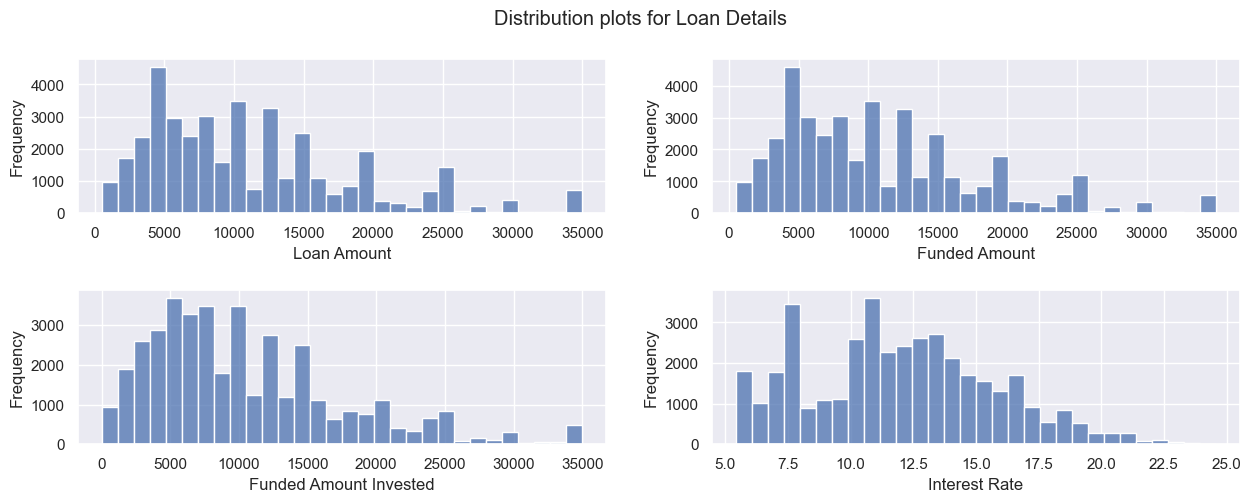

In [29]:
# Plot Loan related columns : , 'funded_amnt', 'funded_amnt_inv', 'int_rate'
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 5))
fig.suptitle('Distribution plots for Loan Details')
fig.subplots_adjust(hspace=0.5)

# Plot 1: Frequency distribution of 'loan_amnt'
sns.histplot(loan['loan_amnt'], kde=False, ax=axs[0,0], bins=30)
axs[0,0].set_xlabel('Loan Amount')
axs[0,0].set_ylabel('Frequency')

# Plot 2: Frequency distribution of 'funded_amnt'
sns.histplot(loan['funded_amnt'], kde=False, ax=axs[0,1], bins=30)
axs[0,1].set_xlabel('Funded Amount')
axs[0,1].set_ylabel('Frequency')

# Plot 3: Frequency distribution of 'funded_amnt_inv'
sns.histplot(loan['funded_amnt_inv'], kde=False, ax=axs[1,0], bins=30)
axs[1,0].set_xlabel('Funded Amount Invested')
axs[1,0].set_ylabel('Frequency')

# Plot 4: Frequency distribution of 'int_rate'
sns.histplot(loan['int_rate'], kde=False, ax=axs[1,1], bins=30)
axs[1,1].set_xlabel('Interest Rate')
axs[1,1].set_ylabel('Frequency')

Observations:
- Loan Amount, Funded Amount and Funded Amount invested has very similar distribution pattern(ignoring the outliners)
- Most loaned and funded amount is around Rs 5000
- Loan Schemes of moderate interest rates are more popular, however there is a sudden peak at interest rate 7.5% which needs further investigation
- Loan Amount and interest rate should be analysed against 'Charged off' Loan types as they reflect meaningful patterns.

##### Univariate Analysis on Customer's Financial Capacity

Text(0, 0.5, 'Frequency')

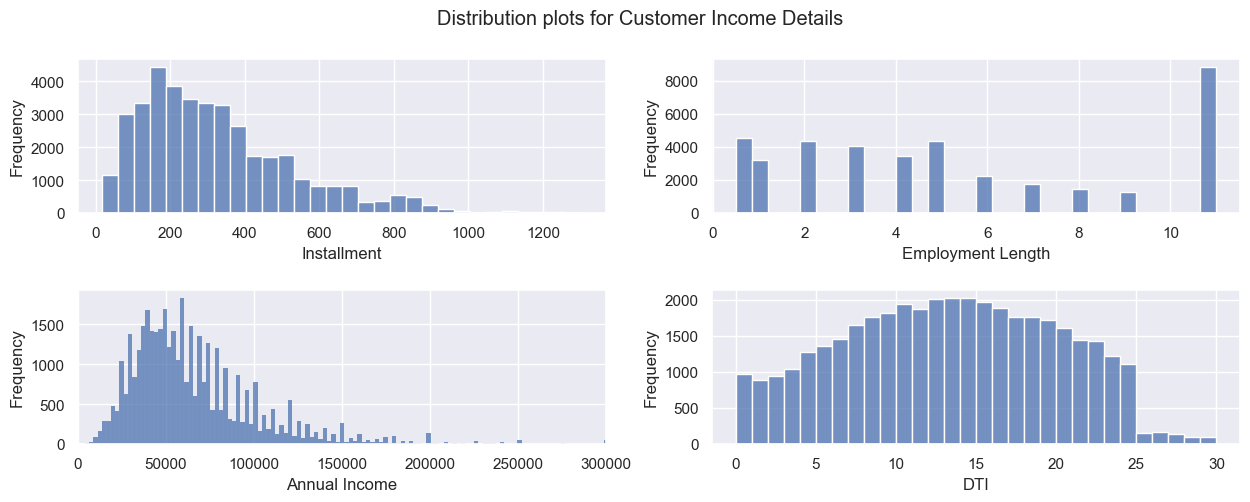

In [30]:
# Plot Customer related columns : 
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 5))
fig.suptitle('Distribution plots for Customer Income Details')
fig.subplots_adjust(hspace=0.5)

# Plot 1: Frequency distribution of 'installment'
sns.histplot(loan['installment'], kde=False, ax=axs[0,0], bins=30)
axs[0,0].set_xlabel('Installment')
axs[0,0].set_ylabel('Frequency')

# Plot 2: Frequency distribution of 'emp_length'
sns.histplot(loan['emp_length'], kde=False, ax=axs[0,1], bins=30)
axs[0,1].set_xlabel('Employment Length')
axs[0,1].set_ylabel('Frequency')

# Plot 3: Frequency distribution of 'annual_inc'
sns.histplot(loan['annual_inc'], kde=False, ax=axs[1,0])
axs[1,0].set_xlim(0,300000)
axs[1,0].set_xlabel('Annual Income')
axs[1,0].set_ylabel('Frequency')

# Plot 4: Frequency distribution of 'DTI'
sns.histplot(loan['dti'], kde=False, ax=axs[1,1], bins=30)
axs[1,1].set_xlabel('DTI')
axs[1,1].set_ylabel('Frequency')


Observations:
- Outliners should be eliminated.
- Installments of lower amount is more in count.
- Customers with employment length > 10 years is more in number , their annual income is approximately 50K.
- Loan Schemes of moderate interest rates are more popular.
- Most of the customers have higher DTI which can be a risk factor.
- These columns have their individual insights, but can have co-relations amongst each other as well. This should be investigated in the bivariate analysis.



##### Univariate Analysis on Payment Status

'inq_last_6mths', 'open_acc', 'revol_bal', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'last_pymnt_amnt' , 'term' , 'revol_util'

##### Univariate Analysis on Dates

'issue_day', 'issue_month', 'issue_year', 'earliest_cr_day',
       'earliest_cr_month', 'earliest_cr_year', 'last_pymnt_day',
       'last_pymnt_month', 'last_pymnt_year', 'last_credit_pull_day',
       'last_credit_pull_month', 'last_credit_pull_year'

##### Analysis on Categorical Variables

'grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'loan_status', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state', 'revol_util'

In [31]:
# Identify cateorical columns
categorical_data = loan.loc[:,['grade', 'sub_grade', 'emp_title', 'home_ownership', 'verification_status', 'loan_status', 'url', 'desc', 'purpose', 'title',
       'zip_code', 'addr_state']]
# Check statistical information for numerical columns
categorical_data.describe()

,grade,sub_grade,emp_title,home_ownership,verification_status,loan_status,url,desc,purpose,title,zip_code,addr_state
count,39715,39715,39715,39715,39715,39715,39715,39715,39715,39715,39715,39715
unique,7,35,28820,5,3,3,39715,26526,14,19614,823,50
top,B,B3,US Army,RENT,Not Verified,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Not Available,debt_consolidation,Debt Consolidation,100xx,CA
freq,12019,2916,2591,18898,16919,32949,1,12941,18641,2184,597,7097


- Columns URL, emp_title, desc has almost all values unique, which means it is less likely to have any predictive pattern.
 So we will rule out these columns from our univariate analysis.
 - title can be considered as super-category for purpose, and it has more unique values. To understand the pattern with more granularity, we will consider 'purpose' for our study.
 - Sub_grade is a sub-category of grade. The observation for both the columns should be directly proportional to each other. So we will investigate on grade and focus on the subcategory of only the grades where number of defaulted loans are max or min.
 - Similarly zip_code and addr_state both gives same geographical insights, hence we are only considering 'addr_state' for our analysis.

<Axes: xlabel='grade', ylabel='count'>

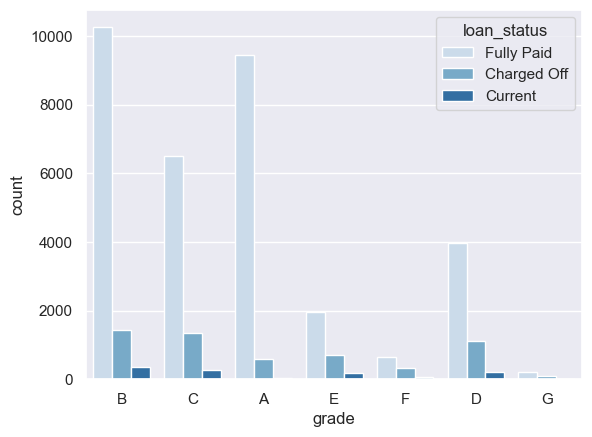

In [32]:
# Plot Categorical columns : 

# Plot 1: Cateory distribution of 'grade'
sns.countplot(x = 'grade', data = loan, hue='loan_status', palette = "Blues")

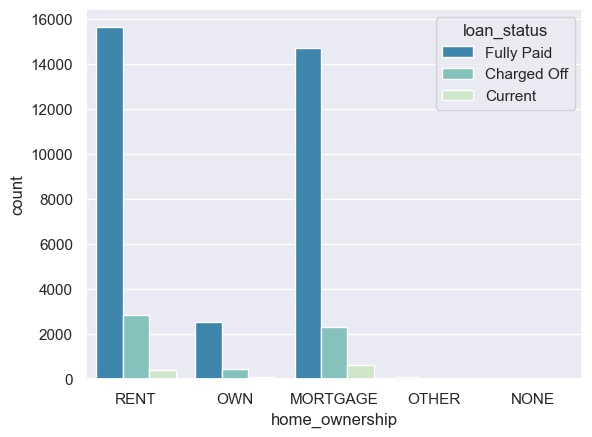

In [33]:
# Plot 2: Cateory distribution of 'grade'
sns.countplot(x = 'home_ownership', data = loan,hue='loan_status', palette = "GnBu_r");

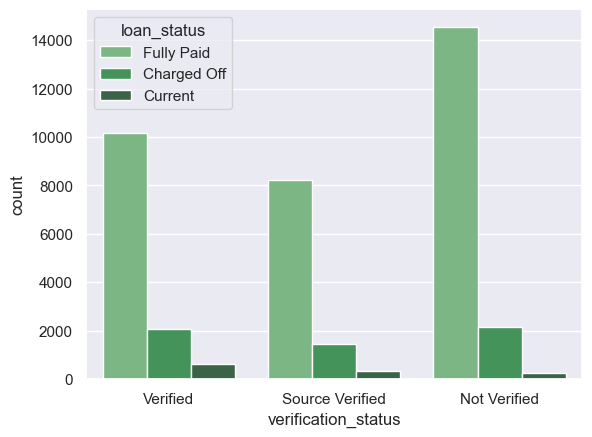

In [34]:
# Plot 3: Cateory distribution of 'grade'
sns.countplot(x = 'verification_status', data = loan,hue='loan_status', palette = "Greens_d");

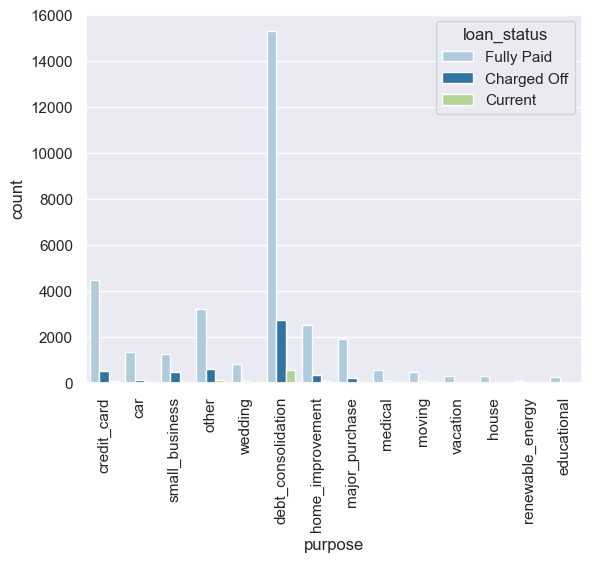

In [35]:
# Plot 4: Cateory distribution of 'purpose'
sns.countplot(x = 'purpose', data = loan,hue='loan_status',palette = "Paired");
plt.xticks(rotation=90)
plt.show()

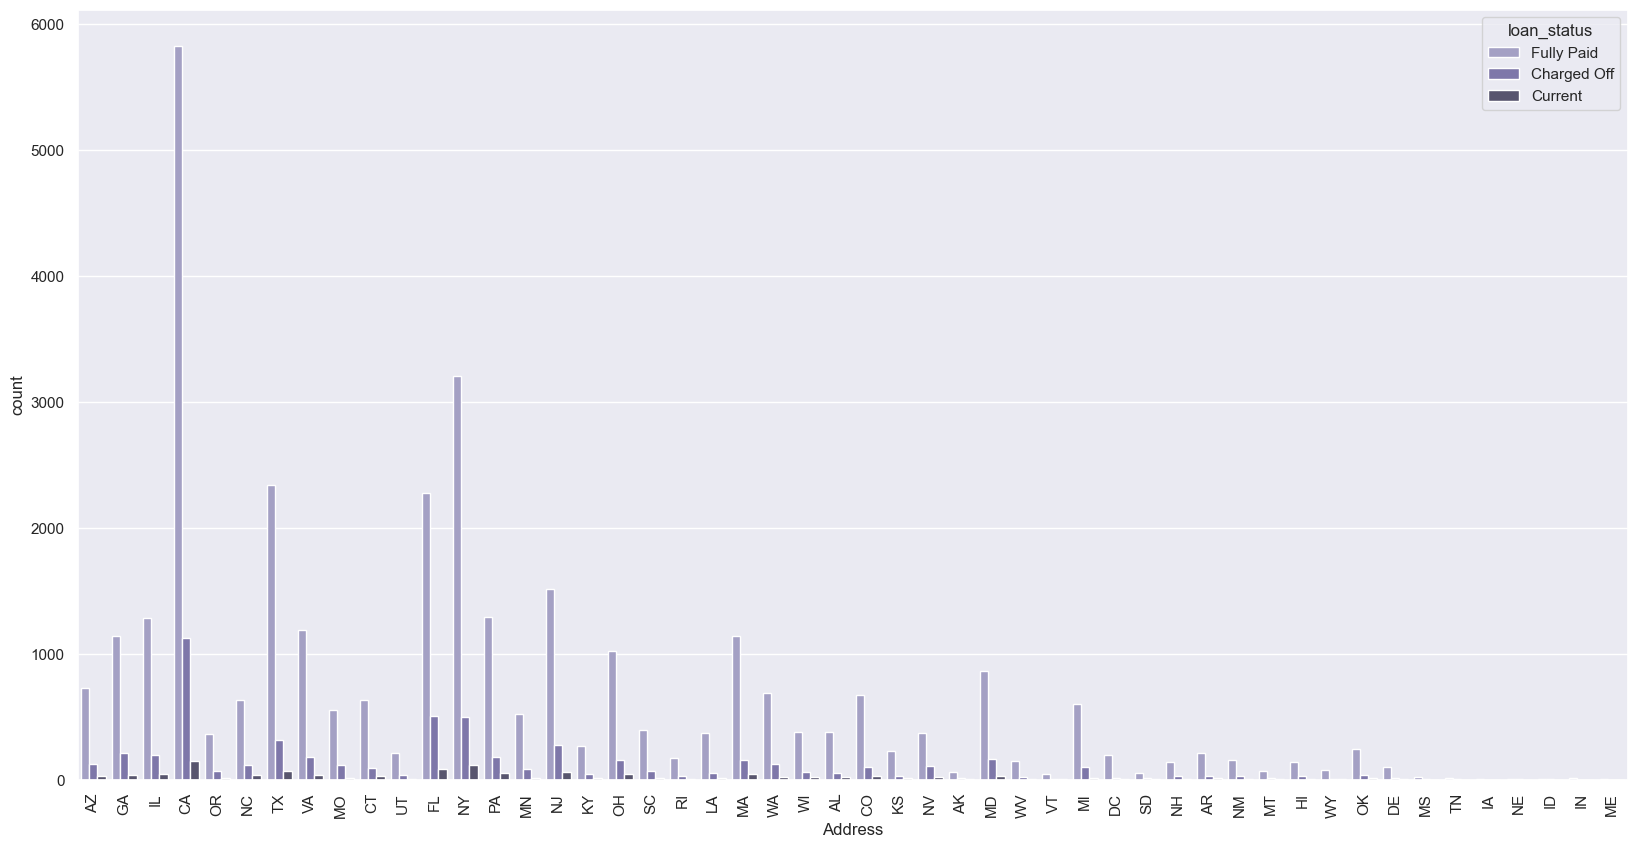

In [36]:
# Plot 5: Cateory distribution of 'addr_state'
sns.countplot(x = 'addr_state',data = loan, hue='loan_status', palette = "Purples_d")
plt.xticks(rotation=90)
plt.xlabel('Address')
plt.gcf().set_size_inches(20,10)
plt.show()

Observations:
- Number of loans defaulted is very less for housing loan customers who own the house.
- Majority of the loans were taken for debt_consolidation, which means, loans were approved for customers already having financial debt.
- Verified customers have less chances of defaulting the loan.
- Canada has the highest number of customer base, hence number of defaulters are also higher in Canada.
- NY and FL also have comparatively higher number of defaulters.

#### Bivariate & Multivariate Analysis

During our univariate analysis, we have observed the following co-relations between certain attributes. We will now investigate them in more details as a part of our analysis. We have considered the loans with loan status as 'Charged off' as our category for defaulted loan.

- Interest Rate and Loan Amount varying with loan status.
- Co-relation between Annual income, Employment Length, Installments and DTI.
- Loan Grade and corresponding sub-grades changing with loan status. 
- Impact of debt-consolidation(purpose) on the defaulted loans.

Text(0, 0.5, 'Amount')

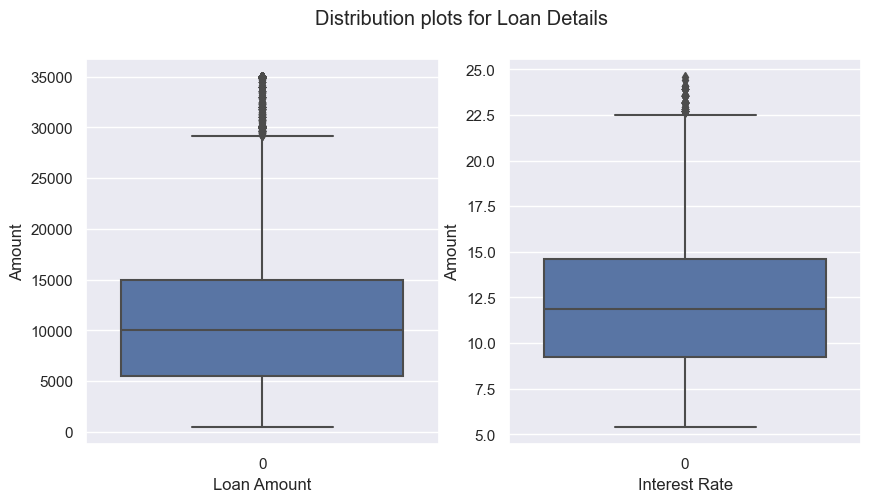

In [37]:
# Check how interest rate and loaned amount varies with the loan status.
# Plot Loan related columns :
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
fig.suptitle('Distribution plots for Loan Details')
fig.subplots_adjust(hspace=1)

# Plot 1: Frequency distribution of 'loan_amnt'
sns.boxplot(loan['loan_amnt'], ax=axs[0])
axs[0].set_xlabel('Loan Amount')
axs[0].set_ylabel('Amount')

# Plot 2: Frequency distribution of 'int_rate'
sns.boxplot(loan['int_rate'], ax=axs[1])
axs[1].set_xlabel('Interest Rate')
axs[1].set_ylabel('Amount')

<Axes: xlabel='loan_status', ylabel='int_rate'>

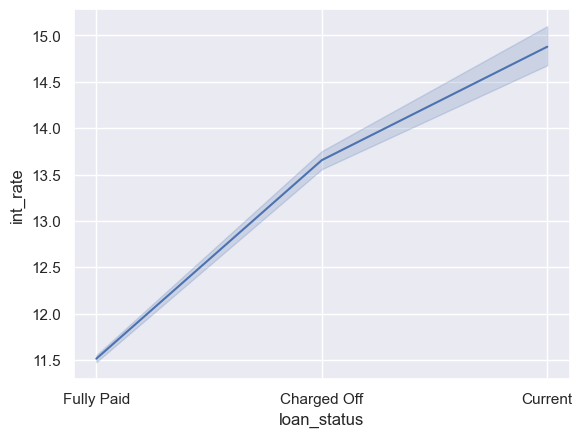

In [38]:

# From our boxplots we can identify the outliners which need to be eliminated from the analysis.
loan_upd = loan[(loan.int_rate<24) & (loan.loan_amnt<30000)]

# Check interest rate for each loan status
sns.lineplot(x = 'loan_status', y = 'int_rate', data = loan_upd)

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

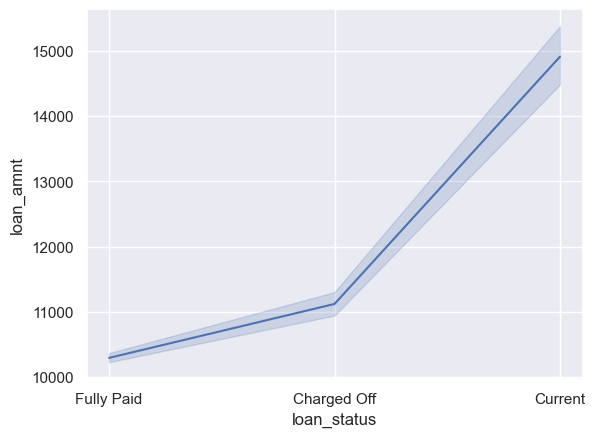

In [39]:
# Check loaned amount for each loan status
sns.lineplot(x = 'loan_status', y = 'loan_amnt', data = loan_upd)

Observation:
- Loans with lower interest rates are paid off but loans with interest rate higher than 13.5% are more charged off. 
- Loan amount has similar pattern for both fully paid loans as well as charged off loans.

Text(0, 0.5, 'Ratio')

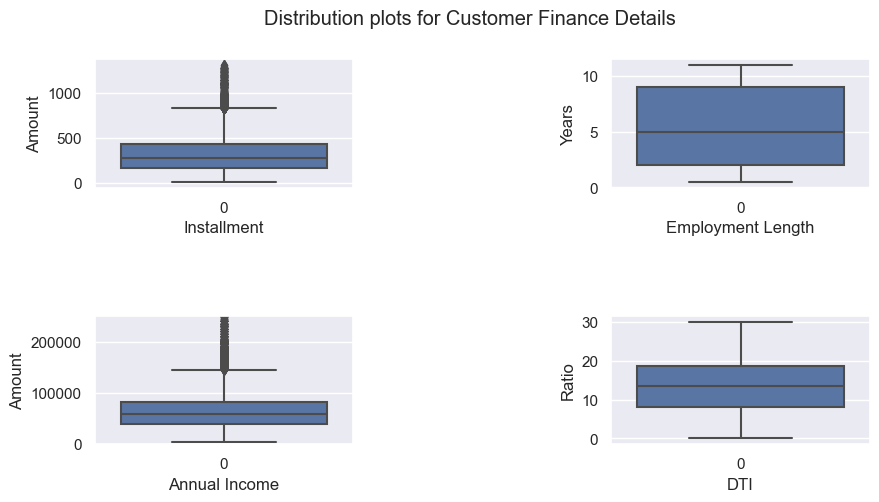

In [40]:
# Co-relation between Annual income, Employment Length, Installments and DTI.

# Plot Customer related columns to identify outliners:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))
fig.suptitle('Distribution plots for Customer Finance Details')
fig.subplots_adjust(hspace=1,wspace=1)

# Plot 1: Frequency distribution of 'Installment'
sns.boxplot(loan['installment'], ax=axs[0,0])
axs[0,0].set_xlabel('Installment')
axs[0,0].set_ylabel('Amount')

# Plot 2: Frequency distribution of 'emp_length'
sns.boxplot(loan['emp_length'], ax=axs[0,1])
axs[0,1].set_xlabel('Employment Length')
axs[0,1].set_ylabel('Years')

# Plot 3: Frequency distribution of 'annual_inc'
sns.boxplot(loan['annual_inc'], ax=axs[1,0])
axs[1,0].set_ylim(0,0.25*10**6)
axs[1,0].set_xlabel('Annual Income')
axs[1,0].set_ylabel('Amount')


# Plot 4: Frequency distribution of 'dti'
sns.boxplot(loan['dti'], ax=axs[1,1])
axs[1,1].set_xlabel('DTI')
axs[1,1].set_ylabel('Ratio')


Text(0, 0.5, 'Debt-to-Income')

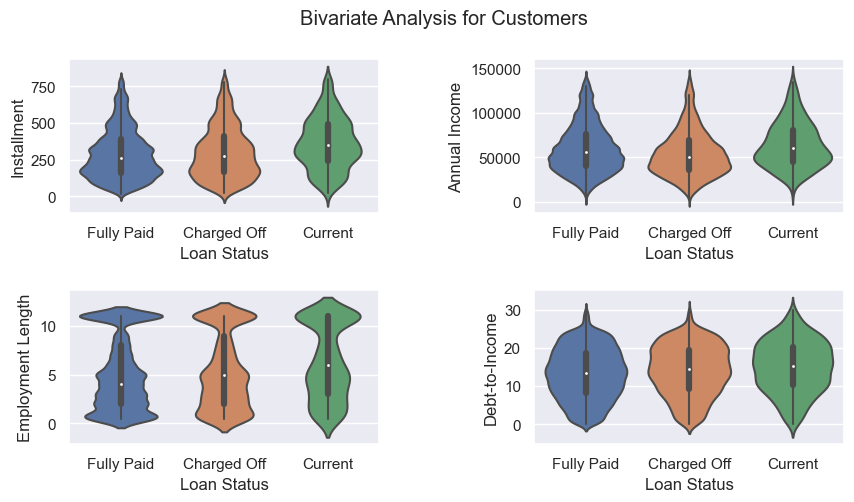

In [77]:
# Eliminate outliners : 

loan_upd = loan[(loan.installment<800) & (loan.annual_inc<140000)].loc[:,['installment','annual_inc','emp_length','dti','loan_status']]


fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))
fig.suptitle('Bivariate Analysis for Customers')
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# Plot 1: 'Loan Status' vs 'Installment'
sns.violinplot(loan_upd, x='loan_status',y='installment',ax=axs[0,0])
axs[0,0].set_xlabel('Loan Status')
axs[0,0].set_ylabel('Installment')

# Plot 2: 'Loan Status' vs 'Annual Income'
sns.violinplot(loan_upd, x='loan_status',y='annual_inc',ax=axs[0,1])
axs[0,1].set_xlabel('Loan Status')
axs[0,1].set_ylabel('Annual Income')

# Plot 3: 'Loan Status' vs 'Employee Length'
sns.violinplot(loan_upd, x='loan_status',y='emp_length',ax=axs[1,0])
axs[1,0].set_xlabel('Loan Status')
axs[1,0].set_ylabel('Employment Length')

# Plot 4: 'Loan Status' vs 'DTI'
sns.violinplot(loan_upd, x='loan_status',y='dti',ax=axs[1,1])
axs[1,1].set_xlabel('Loan Status')
axs[1,1].set_ylabel('Debt-to-Income')


Observation:
- Bivariate Analysis for the customer related fields does not have useful insights.

Text(0, 0.5, 'Count of Loan Sub Grades')

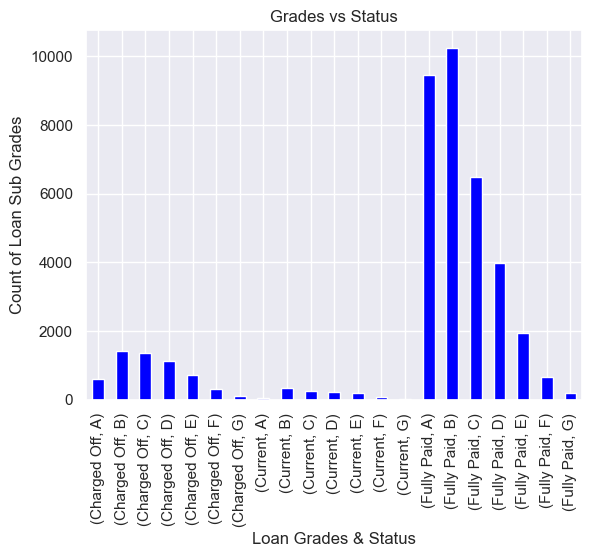

In [95]:
# Check loan grade and sub-grade vs loan status

loan_upd = loan.groupby(['loan_status','grade'])['sub_grade'].count().plot.bar(color='blue')
plt.title('Grades vs Status')
plt.xlabel('Loan Grades & Status')
plt.ylabel('Count of Loan Sub Grades')

Observation:
- Chances of loan default is more for Subgrades of C and D.
- Subgrades of A are paid off more often than subgrades of C & D.

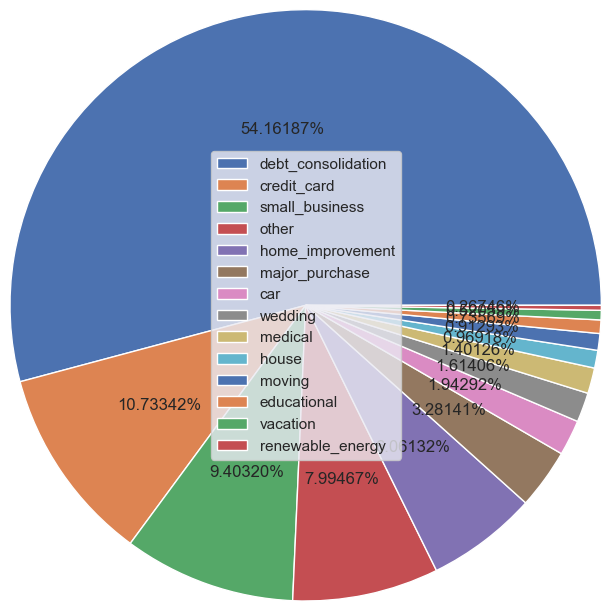

In [204]:
# Check what charged-off amount is for debt-consolidation(purpose)
# Exclude the outliners
loan_upd = loan[(loan['loan_status'] == 'Charged Off') & (loan.loan_amnt<30000)].groupby(['purpose'])['loan_amnt'].sum()
loan_upd = loan_upd.sort_values(ascending=False)
labels = loan_upd.index.to_list()
patches, size, pctg = plt.pie(loan_upd,autopct='%0.5f%%',radius=2)
plt.legend(patches, labels, loc="center")
plt.show()

Observation: 
- 54% of the total charged off loans are for debt consolidation. 

Conclusion: 
- 

- Amounts loaned at higher interest rates(typically more than 13.5%) are charged-off.
- Amounts for loan subgrades of A should be favored over sub-grades for C & D to reduce charged-offs.
- Loans applied for Debt Consolidation are more likely to be charged off.